In [15]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib.pyplot as plt 
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from IPython.display import display, Math, Latex
sys.path.append('/noc/users/am8e13/Python/python_functions/')
#from Variable_button import *

In [16]:
dx=36000
t = 60*60*24*360 #seconds in an year

In [17]:
# Bathy is 1 on land and 0 over sea
x="/scratch/general/am8e13/results36km"
os.chdir(x) 
file2read = netcdf.NetCDFFile("grid.nc",'r')
Depth=file2read.variables['Depth']
Depth=Depth[:]*1
bathy=file2read.variables['HFacC']
bathy=bathy[:]*1
bathy[bathy==0]=-1
bathy[bathy>0]=0
bathy[bathy==-1]=1

bathy1 = bathy[0,:,:]

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [18]:
# Multitracer Tracer analysis 
x="/scratch/general/am8e13/results2_multitrac36km//"
os.chdir(x)
file2read = netcdf.NetCDFFile("ptracers.nc",'r')
# Tracers
storeggaSmall=file2read.variables['storeggaSmall']
storeggaSmall=storeggaSmall[:]*1
storeggaBig=file2read.variables['storeggaBig']
storeggaBig=storeggaBig[:]*1
storeggaNorth=file2read.variables['storeggaNorth']
storeggaNorth=storeggaNorth[:]*1
traenadjupet=file2read.variables['traenadjupet']
traenadjupet=traenadjupet[:]*1
bearisland=file2read.variables['bearisland']
bearisland=bearisland[:]*1
andoya=file2read.variables['andoya']
andoya=andoya[:]*1

Y=file2read.variables['Y']
Y=Y[:]*1
Z=file2read.variables['Z']
Z=Z[:]*1
X=file2read.variables['X']
X=X[:]*1
I=file2read.variables['iter']
I=I[:]*1
days=file2read.variables['T']
days=days[:]*1

storeggaSmall_ave = np.sum(storeggaSmall,axis = 1)
storeggaBig_ave = np.sum(storeggaBig,axis = 1)
storeggaNorth_ave = np.sum(storeggaNorth,axis = 1)
traenadjupet_ave = np.sum(traenadjupet,axis = 1)
bearisland_ave = np.sum(bearisland,axis = 1)
andoya_ave = np.sum(andoya,axis = 1)


In [19]:
#  The simulations below show the behaviour of different passive tracers. 
#  Tracers correspond to the locations of known source of sediment.
#  These experiments are 40y long each, starting from a 770y spun up circulation.

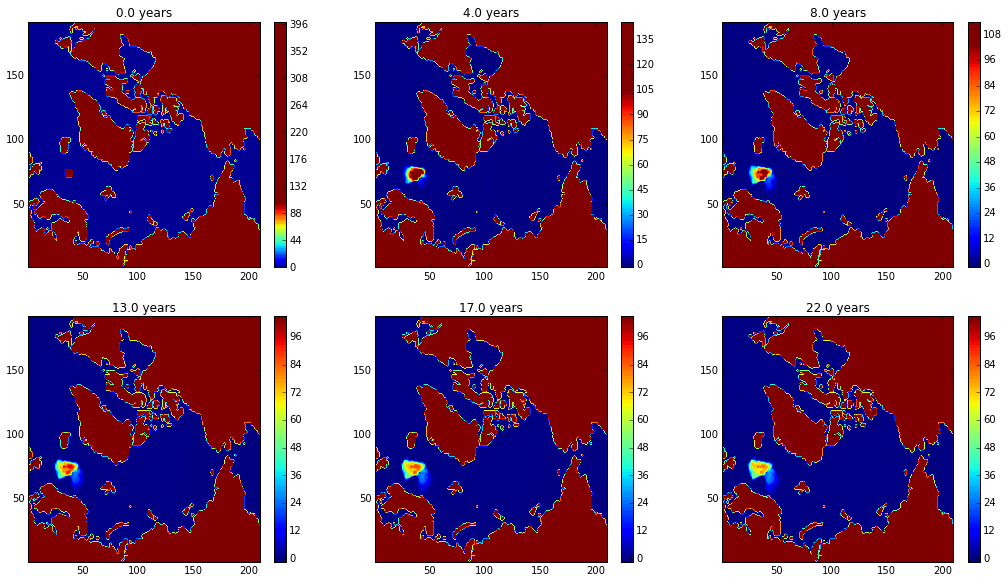

In [20]:
# Storegga Mud-pond (small)
fig, axes = plt.subplots(nrows=2, ncols=3)
i=0
bathyfig = bathy1*storeggaSmall_ave[100:,:,:].max()
vimin = 0
vimax = storeggaSmall_ave[100:,:,:].max()

for ax in axes.flat:
    cs = ax.contourf(X,Y,storeggaSmall_ave[i*40,:,:]+ bathyfig,100,vmin=vimin, vmax=vimax)
    fig.colorbar(cs, ax=ax)
    ax.set_title(""+str((days[(i*40)]-days[0])//t) +" years")
    i=i+1

fig.subplots_adjust(right=2.4,top=2)

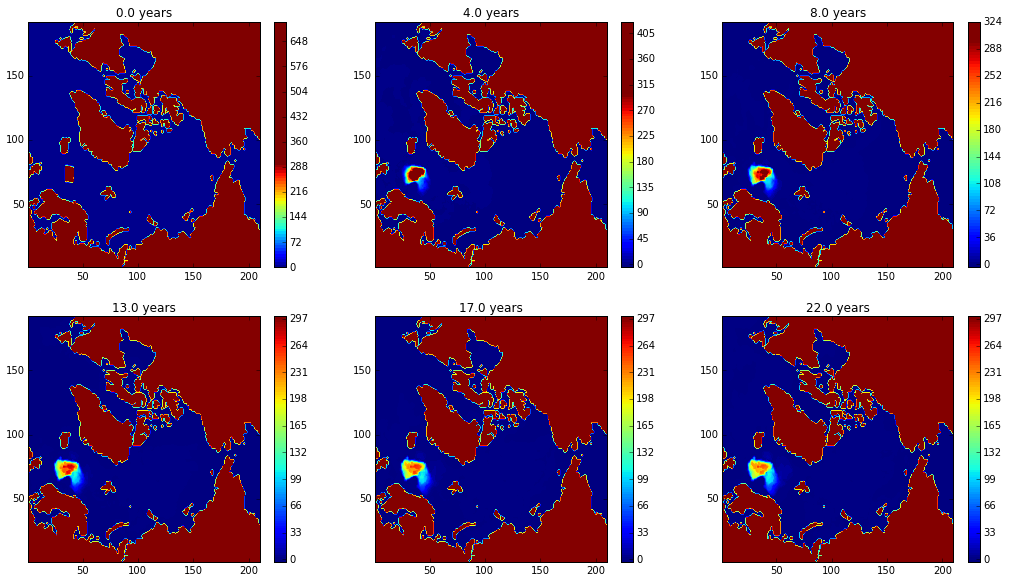

In [21]:
# Storegga Mud-pond (big)
fig, axes = plt.subplots(nrows=2, ncols=3)
i=0
bathyfig = bathy1*storeggaBig_ave[100:,:,:].max()
vimin = 0
vimax = storeggaBig_ave[100:,:,:].max()

for ax in axes.flat:
    cs = ax.contourf(X,Y,storeggaBig_ave[i*40,:,:]+ bathyfig,100,vmin=vimin, vmax=vimax)
    fig.colorbar(cs, ax=ax)
    ax.set_title(""+str((days[(i*40)]-days[0])//t) +" years")
    i=i+1

fig.subplots_adjust(right=2.4,top=2)

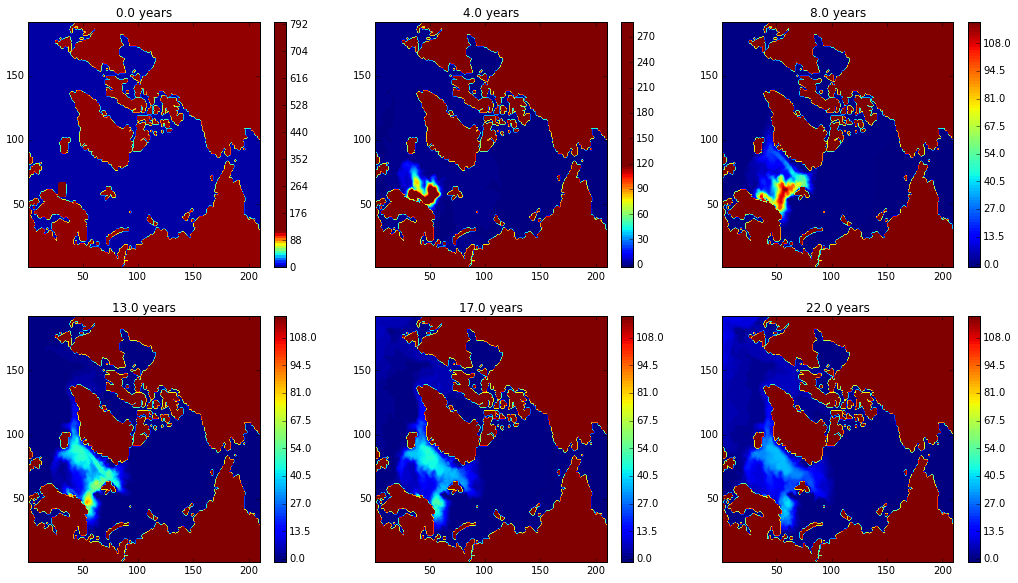

In [22]:
# Storegga North Flanck 
fig, axes = plt.subplots(nrows=2, ncols=3)
i=0
bathyfig = bathy1*storeggaNorth_ave[100:,:,:].max()
vimin = 0
vimax = storeggaNorth_ave[100:,:,:].max()

for ax in axes.flat:
    cs = ax.contourf(X,Y,storeggaNorth_ave[i*40,:,:]+ bathyfig,100,vmin=vimin, vmax=vimax)
    fig.colorbar(cs, ax=ax)
    ax.set_title(""+str((days[(i*40)]-days[0])//t) +" years")
    i=i+1

fig.subplots_adjust(right=2.4,top=2)

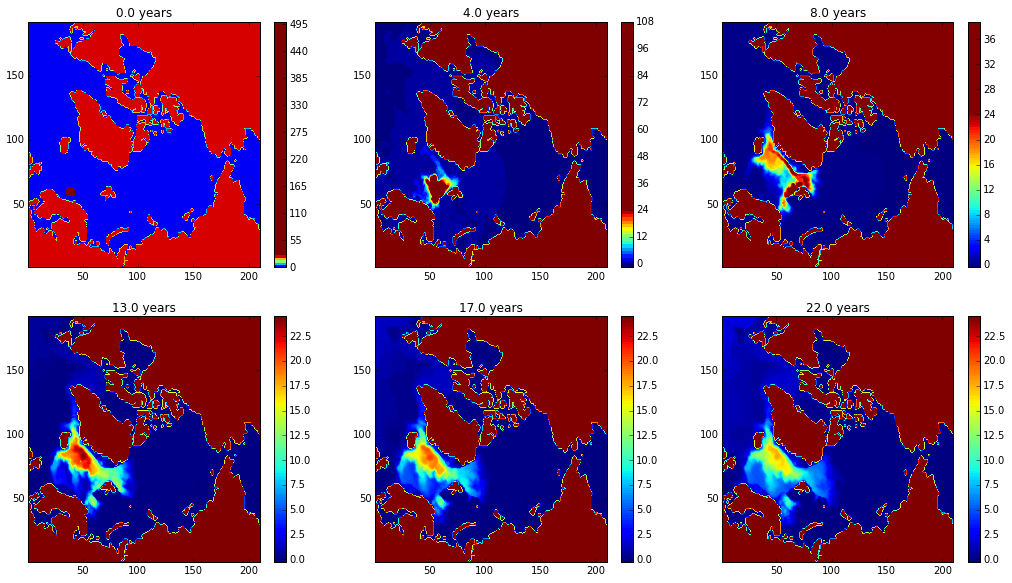

In [23]:
# Traenadjupet mud pond
fig, axes = plt.subplots(nrows=2, ncols=3)
i=0
bathyfig = bathy1*traenadjupet_ave[100:,:,:].max()
vimin = 0
vimax = traenadjupet_ave[100:,:,:].max()

for ax in axes.flat:
    cs = ax.contourf(X,Y,traenadjupet_ave[i*40,:,:]+ bathyfig,100,vmin=vimin, vmax=vimax)
    fig.colorbar(cs, ax=ax)
    ax.set_title(""+str((days[(i*40)]-days[0])//t) +" years")
    i=i+1

fig.subplots_adjust(right=2.4,top=2)

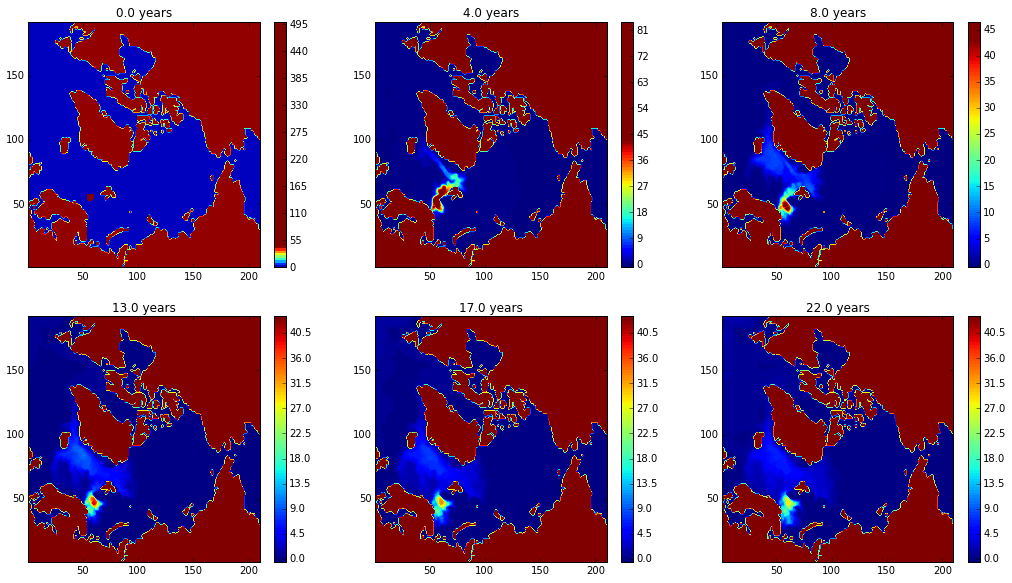

In [24]:
# Bear Island Fan
fig, axes = plt.subplots(nrows=2, ncols=3)
i=0
bathyfig = bathy1*bearisland_ave[100:,:,:].max()
vimin = 0
vimax = bearisland_ave[100:,:,:].max()

for ax in axes.flat:
    cs = ax.contourf(X,Y,bearisland_ave[i*40,:,:]+ bathyfig,100,vmin=vimin, vmax=vimax)
    fig.colorbar(cs, ax=ax)
    ax.set_title(""+str((days[(i*40)]-days[0])//t) +" years")
    i=i+1

fig.subplots_adjust(right=2.4,top=2)

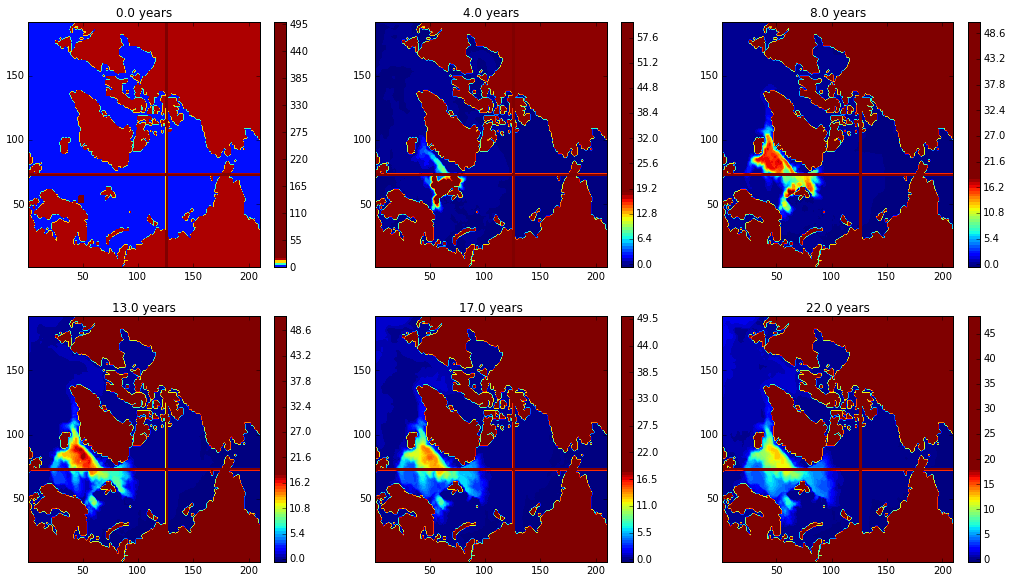

In [36]:
# Andoya slide
fig, axes = plt.subplots(nrows=2, ncols=3)
i=0
bathyfig = bathy1*andoya_ave[100:,:,:].max()
vimin = 0
vimax = andoya_ave[100:,:,:].max()

for ax in axes.flat:
    cs = ax.contourf(X,Y,andoya_ave[i*40,:,:]+ bathyfig,100,vmin=vimin, vmax=vimax)
    fig.colorbar(cs, ax=ax)
    ax.set_title(""+str((days[(i*40)]-days[0])//t) +" years")
    i=i+1

fig.subplots_adjust(right=2.4,top=2)